# Repaso de teoría de probabilidad

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://storage.needpix.com/rsynced_images/bayesian-2889576_1280.png" width="200px" height="180px" />

> Antes de comenzar en materia, es importante tener claras las bases de teoría de probabilidad sobre las que construiremos todos los métodos que veremos en el curso.

> Por esa razón haremos un breve repaso de los conceptos que necesitaremos de teoría de probabilidad.

> **Objetivos:**
> - Repasar definiciones y resultados básicos de teoría de probabilidad.
> - Entender el concepto de independencia.
> - Entender el concepto de probabilidad condicional.

> **Referencias:**
> 
> - Probabilistic Graphical Models: Principles and Techniques, By Daphne Koller and Nir Friedman. Cap. 2.


<p style="text-align:right;"> Imagen recuperada de: https://storage.needpix.com/rsynced_images/bayesian-2889576_1280.png.</p>

___

## 1. Distribuciones de probabilidad.

Normalmente cuando usamos la palabra "probabilidad" o vocablos relacionados en la vida cotidiana, nos referimos al grado de confianza que tenemos de que un evento con incertidumbre ocurra.

- Por ejemplo: "es probable que hoy llueva"; "probablemente el Bayern Münich gane la champions".

La **teoría de probabilidad** formaliza las bases para discutir la validez de este tipo de afirmaciones, y nos da las reglas que deben cumplir.

### 1.1. Definición

Para definir las *distribuciones de probabilidad*, son necesarios dos ingredientes:

1. **Espacio de resultados**: conjunto de posibles resultados, el cual denotamos por $\Omega$.

   - Ejemplo: en la tirada de un dado podríamos considerar $\Omega=\{1, 2, 3, 4, 5, 6\}$.
   

In [1]:
from sklearn.datasets import load_iris

In [2]:
data = load_iris()

In [3]:
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

2. **Eventos**: los eventos son **subconjuntos** del espacio de resultados a los que queremos asignar una probabilidad. El conjunto de todos los eventos lo denotamos por $\mathcal{S}$.

   - Ejemplo: en el ejemplo de los dados, el *evento* $\{6\}$ representa el caso donde el dado cae en seis. El *evento* $\{1, 3, 5\}$ representa el caso de que caiga impar.
   
   Es importante recalcar de que los eventos son subconjuntos más no elementos del espacio de resultados. Formalmente,
   
   $$\forall \alpha \in \mathcal{S}, \alpha \subseteq \Omega.$$
   
   La teoría de probabilidad, requiere que el espacio de todos los eventos, $\mathcal{S}$, satisfaga tres propiedades básicas:
   
   - $\emptyset, \Omega \in \mathcal{S}$: contiene al evento vacío y al evento trivial.
   - $\alpha,\beta \in \mathcal{S} \Rightarrow \alpha \cup \beta \in \mathcal{S}$: cerrado bajo la unión.
   - $\alpha \in \mathcal{S} \Rightarrow (\Omega - \alpha) \in \mathcal{S}$: cerrado bajo complemento.

> *Definición.* Una **distribución de probabilidad** $P$ sobre $(\Omega, \mathcal{S})$ es una función del espacio de eventos en los números reales $P:\mathcal{S} \to \mathbb{R}$ tal que:
> - $P(\alpha) \geq 0$, para todo $\alpha \in \mathcal{S}$;
> - $P(\Omega) = 1$; y
> - Si $\alpha, \beta \in \mathcal{S}$ y $\alpha \cap \beta = \emptyset$, entonces $P(\alpha \cup \beta) = P(\alpha) + P(\beta)$.

Notemos que la anterior definición nos dice que:
1. Todas las probabilidades son positivas,
2. la probabilidad del evento trivial (todos los posibles resultados) tiene la máxima probabilidad que es de 1,
3. la probabilidad de la unión de eventos mutuamente exclusivos es la suma de las probabilidades de los eventos.

La propiedad 3 en la anterior definición se puede extender para cantidades arbitrarias de eventos:

> *Proposición.* Si $P$ es una distribución de probabilidad sobre $(\Omega, \mathcal{S})$ y $\alpha_1,\dots\alpha_k\in\mathcal{S}$, con $k\in\mathbb{N}$, son tales que $\alpha_i \cap \alpha_j = \emptyset$ para todo $i,j \leq k$, entonces:
>
> $$P(\alpha_1 \cup \dots \cup \alpha_k) = P(\alpha_1) + \dots + P(\alpha_k).$$

> *Prueba.* <font color=green>En clase ...</font>

Por otra parte, la definición implica lo siguiente:

> *Proposición.* Si $P$ es una distribución de probabilidad sobre $(\Omega, \mathcal{S})$, entonces:
>
> (i) $P(\emptyset)=0$; y
>
> (ii) $P(\alpha \cup \beta) = P(\alpha) + P(\beta) - P(\alpha \cap \beta)$, para todo $\alpha, \beta \in \mathcal{S}$.

> *Prueba.* <font color=green>En clase ...</font>

**Ejemplo:** 

Retomamos todos estos conceptos sobre el ejemplo básico de la tirada de un dado justo.

* Espacio de resultados: $\Omega=\{1, 2, 3, 4, 5, 6\}$.

* Eventos a considerar: $\alpha_1=\{5\}$, $\alpha_2=\{1, 3, 5\}$, $\alpha_3=\{2, 4, 6\}$.

### 1.2. Interpretación de la probabilidad

Antes de proseguir, discutamos la interpretación que podemos asignar a las distribuciones de probabilidad.

Intuitivamente, la probabilidad $P(\alpha)$ de un evento $\alpha$ cuantifica el grado de confianza que tenemos en que $\alpha$ va a ocurrir. En los casos extremos:
 - Si $P(\alpha)=1$, estamos seguros de que alguno de los resultados en $\alpha$ ocurrirá;
 - si por el contrario $P(\alpha)=0$, consideramos que todos los resultados en $\alpha$ son imposibles.

Otros valores representan grados de confianza que yacen entre estos extremos.

Sin embargo, esto no nos dice nada acerca de lo que significan los números como tal.

**Interpretacion frecuentista:**

Bajo esta interpretación, vemos las probabilidades como frecuencias de eventos. Esto es, la probabilidad de un evento corresponde con la fracción de veces que ese evento ocurre si el experimento se repitiera de manera *indefinida*.

Esta interpretación resulta muy intuitiva cuando hablamos acerca de fenómenos físicos concretos: tirar una moneda, tirar un dado, juegos de cartas, entre otros. Por otra parte, es fácil verificar que las frecuencias satisfacen todos los requerimientos de las distribuciones de probabilidad.

Sin embargo, esta interpretación no es para nada intuitiva cuando consideramos un evento como "lloverá mañana". En este caso resulta poco claro como definir la frecuencia de un evento como este.

**Interpretación subjetiva:**

Esta interpretación representa una afirmación subjetiva del grado de confianza de que el evento ocurrirá.

Es decir, si yo digo "Lloverá mañana con una probabilidad de $30$%", estoy expresando mi grado de confianza en cuanto a la ocurrencia de ese evento.

___
## 2. Conceptos básicos en teoría de probabilidad.

### 2.1. Probabilidad condicional

Este es el concepto base para **incorporar evidencia (información)** a nuestros análisis.

Supongamos que estamos observando el conjunto de estudiantes en el curso de métodos Bayesianos. El espacio de resultados es simplemente todos los estudiantes en la población.

Supongamos que queremos razonar acerca de las variables de inteligencia y nota final de los estudiantes.

Definamos los siguiente eventos:
 - $\alpha$: todos los estudiantes con notas iguales o superiores a 9.
 - $\beta$: todos los estudiantes que son muy inteligentes.
 
De forma que, usando la distribución de probabilidad sobre esta situación podemos averiguar la probabilidad de cada uno de estos eventos, así como la probabilidad de $\alpha \cap \beta$.

Teniendo esto en mente, supongamos que sabemos que cierto estudiante obtuvo una nota superior a 9. ¿Qué nos dice esto acerca de us inteligencia?

Este tipo de preguntas surgen a cada momento en problemas reales, como ya lo vimos en la motivación.

La respuesta a esta pregunta viene dada por la noción de **probabilidad condicional**. Formalmente, 

> *Definición.* La probabilidad condicional de $\beta$ dado $\alpha$ se define como
> $$P(\beta| \alpha) = \frac{P(\alpha \cap \beta)}{P(\alpha)},$$
> siempre que $P(\alpha) \neq 0$. En el caso en que $P(\alpha) = 0$, la probabilidad condicional está indefinida.

La interpretación (frecuentista) de esta definición es muy simple: La probabilidad condicional de $\beta$ dado $\alpha$ es la proporción relativa de los eventos que satisfacen $\beta$ considerando únicamente los eventos que satisfacen $\alpha$.

### 2.2. Regla de la cadena y regla de Bayes

Inmediatamente de la definición de probabilidad condicional, obtenemos que

$$P(\alpha \cap \beta) = P(\alpha)P(\beta| \alpha).$$

Esta igualdad se conoce como **regla de la cadena de proabilidades condicionales**.

A partir de esto, es posible demostrar que:

> *Proposición.* (**Regla de la cadena**) Sean $\alpha_1,\dots,\alpha_k$ eventos, con $k\in\mathbb{N}$. Entonces,
>
> $$P(\alpha_1\cap\dots\cap\alpha_k) = P(\alpha_1)P(\alpha_2|\alpha_1)\dots P(\alpha_k|\alpha_1, \dots, \alpha_{k-1}).$$

> *Prueba.* <font color=red>Tarea ...</font>

Por otra parte, también partiendo de la definición de probabilidad condicional, se sigue la **regla de Bayes**:

$$P(\alpha | \beta) = \frac{P(\beta | \alpha) P(\alpha)}{P(\beta)}.$$

La regla de Bayes es muy importante debido a quenos permite calcular la probabilidad condicional $P(\alpha | \beta)$  a partir de la probabilidad condicional "inversa" $P(\beta | \alpha)$.

> *Proposición.* (**Probabilidad condicional en dos eventos**) Sean $\alpha,\beta,\gamma$ eventos. Entonces,
>
> $$P(\alpha|\beta \cap \gamma) = \frac{P(\alpha \cap \beta | \gamma)}{P(\beta | \gamma)}.$$

> *Prueba.* <font color=green>En clase ...</font>

___
## 3. Variables aleatorias (VA) y distribuciones conjuntas

### 3.1. Variables aleatorias

Hasta ahora, nuestra discusión de distribuciones de probabilidad tenía que ver con eventos. Formalmente, podemos considerar cualquier evento del espacio de eventos.

En este sentido, la descripción de los eventos la damos en términos de subconjuntos del espacio de resultados.

Por otra parte, resulta muchísimo más natural considerar *atributos* de los resultados. Por ejemplo, en el caso de los estudiantes, consideramos atributos como "nota final", "edad", "género", entre otros.

De esta manera, nos interesa considerar eventos como "nota final > 8", o "edad < 35", entre otros.

La manera formal de razonar usando atributos de los diferentes resultados es usando el concepto de **variables aleatorias** (VA). Una VA es una manera de definir un evento de los resultados que satisfacen cierto atributo.

Por ejemplo, la expresión $P(nota final > 8)$ representa la probabilidad de que un estudiante cualquiera obtenga una nota superior a 8.

Formalmente,

> *Definición.* Una **variable aleatoria** $X$ es una función que asocia a cada elemento en el espacio de resultados $\Omega$ un valor.

De manera que si $X$ es por ejemplo la VA de nota final, usaremos de manera concisa la expresión $X>8$ para referirnos al evento ${\omega\in\Omega: X(\omega) > 8}$ de todos los estudiantes que obtuvieron una nota mayor a $8$.

Usualmete, denotamos a las VA con letras mayúsculas, por ejemplo $X, Y, Z$; y usamos letras munúsculas para referirnos a valores arbitrarios de las VA. Por ejemplo, usamos expresiones como:

$$P(X=x)\geq 0, \text{ para todo } x\in\mathrm{Val}(X).$$

Dependiendo de los tipos de valores que pueden tomar las VAs, consideramos dos tipos:

#### Discretas

![dice](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c4/2-Dice-Icon.svg/600px-2-Dice-Icon.svg.png)

- Las variables aleatorias discretas son aquellas que pueden tomar un conjunto **finito** (o a lo sumo **contable** ~ $\mathbb{N}$) de valores.

- Un ejemplo de un fenómeno que podemos modelar con una VA discreta es la tirada de un dado.

- En este caso, la manera más conveniente de definir una distribución discreta de probabilidad es a través de la Función de Probabilidad (PMF - Probability Mass Function), la cual nos da el valor de la probabilidad para cada posible valor de la VA.

- Por ejemplo, consideramos la VA $X$, para la cual $\mathrm{Val}(X) = \{2, 5, 8\}$. Una función de probabilidad podría ser:
  $$
  P(X) = \left\{\begin{array}{cc }0.3 & X=2 \\ 0.3 & X=5 \\ 0.4 & X=8\end{array}\right.
  $$

In [1]:
# Importar matplotlib.pyplot
from matplotlib import pyplot as plt
# Importar scipy.stats
from scipy import stats

In [4]:
# Definir listas de valores de X y probabilidades asociadas
xk = [2, 5, 8]
pk = [0.3, 0.3, 0.4]
X = stats.rv_discrete(name="X", values=(xk, pk))

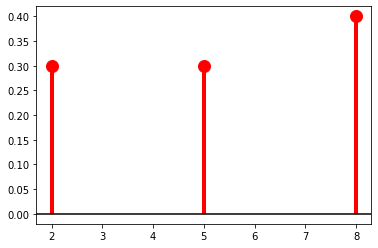

In [11]:
# Grafico
fig, ax = plt.subplots(1, 1)
ax.plot(xk, X.pmf(xk), 'ro', ms=12)
ax.vlines(xk, 0, X.pmf(xk), colors='r', lw=4)
ax.axhline(y=0, color='k')
plt.show()

Notar que para que sea una distribución válida de probabilidad (acorde a la definición), todas las probabilidades deben sumar 1. Matemáticamente:

$$\sum_{i=1}^{k}P(X=x^i)=1.$$

In [12]:
# Suma de probabilidades igual a 1
sum(pk)

1.0

#### Continuas

![thermo](https://upload.wikimedia.org/wikipedia/commons/e/e0/Thermometer_-_by_Don.jpg)

- Las variables aleatorias continuas son aquellas que pueden tomar un valores en rangos continuos (subconjuntos de $\mathbb{R}$).

- Un ejemplo de un fenómeno que podemos modelar con una VA continua es la temperatura del presente día.

- En este caso, la manera más conveniente de definir una distribución continua de probabilidad es a través de la Función de Densidad de Probabilidad (PDF - Probability Density Function), la cual asigna un valor no negativo de probabilidad para cada valor real.

- Como ejemplo, tomamos la distribución normal $X \sim \mathcal{N}(\mu, \sigma^2)$:
  $$
  p(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left\{-\frac{(x - \mu)^2}{2 \sigma^2}\right\}.
  $$

In [30]:
import numpy as np

In [31]:
# Definir una VA normal para la temperatura
mu, sigma = 20, 2
X = stats.norm(loc=mu, scale=sigma)

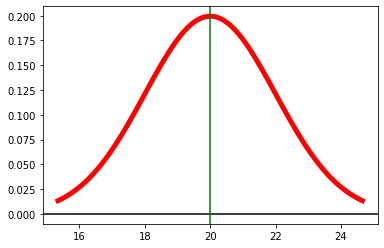

In [36]:
# Graficar
x = np.linspace(X.ppf(0.01), X.ppf(0.99), 100)
fig, ax = plt.subplots(1, 1)
ax.plot(x, X.pdf(x), 'r-', lw=5, label='norm pdf')
ax.axhline(y=0, color='k')
ax.axvline(x=X.mean(), color='g')
plt.show()

Usando la función de densidad, la probabilidad de que la VA $X$ esté en un intervalo dado $[a,b]$ es:

$$
P(X \in [a, b]) = \int_{a}^{b} p(x) \mathrm{d}x.
$$

Así, para que sea una distribución válida de probabilidad (acorde a la definición), la integral de esta función sobre los reales debe ser 1. Matemáticamente:

$$\int_{-\infty}^{\infty}p(x) \mathrm{d}x=1.$$

In [38]:
# Integral igual a 1
X.cdf(x=np.inf)

1.0

### 3.2. Distribuciones marginales y conjuntas

**Distribución marginal**

Una vez definimos la VA $X$, podemos considerar la distribución de probabilidad sobre eventos que pueden ser descritos usando $X$. Esta distribución la conocemos como **distribución marginal** sobre la VA $X$, y la denotamos como $P(X)$.

En el ejemplo del estudiante podemos considerar las VA, $I$(nteligencia) y $N$(ota). 

Consideramos lo siguiente:
 - $\mathrm{Val}(I) = \{i^0, i^1\}$, donde $i^1$: inteligente e $i^0$: no tanto.
 - $\mathrm{Val}(N) = \{n^0, n^1, n^2\}$, donde $n^2$: nota mayor o igual 8; $n^1$: nota mayor o igual a 6 y menor que 8; y $n^0$: nota menor que 6.
 
De manera que para especificar completamente la distribución marginal sobre $I$, necesitamos poder especificar las probabilidades para cada valor de $I$. Concretamente $P(I=i^0) = 0.7$ y $P(I=i^0) = 0.3$.

Similarmente, para $N$, $P(N=n^0) = 0.38$, $P(N=n^1) = 0.37$, y $P(N=n^2) = 0.25$.

**Distribución conjunta**

Por otra parte, es muy común que estemos interesados en razonar acerca de varios atributos a la vez. Por ejemplo, nos interesaría el evento $(I=i^1, N=n^2)$.

Para poder razonar de esta manera, debemos considerar la **distribución conjunta** sobre estas dos VA.

En general, la distribución conjunta sobre un conjunto de VA $\{X_1,\dots,X_n\}$ la denotamos por

$$P(X_1,\dots,X_n)$$

y es una distribución que asigna probabilidades a eventos que se especifican en términos de dichas VA.

Para el evento en el que estamos interesados, tendríamos:

$$
P(I=i^1, N=n^2) = 0.18.
$$

Adicionalmente, la distribución conjunta debe ser coherente con la distribución marginal en el sentido que:

$$
P(X=x) = \sum_{y} P(X=x, Y=y) \qquad \text{Si las VA son discretas,}
$$

$$
p(x) = \int_{-\infty}^{\infty} p(x, y) \mathrm{d}y \qquad \text{Si las VA son continuas.}
$$

Ejemplo:

In [1]:
from IPython.display import Image

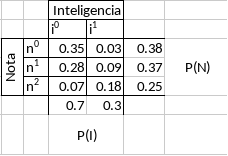

In [2]:
Image(filename='joint.png')

Finalmente, cabe mencionar que las nociones de probabilidad condicional, regla de la cadena y regla de Bayes se extienden naturalmente a VA. Esto es:

> *Definición.* Sean $X,Y$ VAs. La probabilidad condicional de $X$ dado $Y$ se define como
> $$P(X | Y) = \frac{P(X, Y)}{P(Y)},$$
> siempre que $P(Y) \neq 0$. En el caso en que $P(Y) = 0$, la probabilidad condicional está indefinida.

La anterior definición involucra probabilidad **condicional**, **conjunta** y **marginal**.

> *Proposición.* (**Regla de la cadena**) Sean $X_1,\dots,X_k$ VAs, con $k\in\mathbb{N}$. Entonces,
>
> $$P(X_1,\dots,X_k) = P(X_1)P(X_2|X_1)\dots P(X_k| X_1, \dots, X_{k-1}).$$

> *Proposición.* (**Regla de Bayes**) Sean $X,Y$ VAs. Se cumple que:
> $$P(X | Y) = \frac{P(Y | X) P(X)}{P(Y)}.$$

## 4. Independencia

Al definir el concepto de probabilidad condicional lo motivamos porque es el mecanismo básico para incluir evidencia en nuestro razonamiento. De esta manera esperamos, en general que $P(X | Y) \neq P(X)$.

Sin embargo, lo anterior puede no ocurrir en ciertas ocasiones, de manera que $P(X | Y) = P(X)$. Es decir, el conocer $Y$ no cambia en absoluto la probabilidad de $X$. Este concepto lo conocemos como **independencia**

> *Definición.* Sean $X,Y$ VAs. Decimos que $X$ es independiente de $Y$ en $P$, o que $P$ satisface $X \perp Y$, si $P(X |Y) = P(X)$, o si $P(Y)=0$.

Equivalentemente,

> *Proposición.* $P$ satisface $X \perp Y$ si y solo si $P(X, Y) = P(X) P(Y).$

> *Prueba.* <font color=green>En clase ...</font>

Como consecuencia inmediata de la anterior proposición, se sigue que la noción de independencia es simétrica. Esto es, si $X \perp Y$ entonces $Y \perp X$.

Como ejemplo, podemos tomar la situación de tirar una moneda al aire. Definimos la VA para el $i-$ésimo tiro de la moneda como:

$$
X_i = \left\{ \begin{array}{ccc} 1 & \text{si} & \text{la moneda cae cara} \\
                                 0 & \text{si} & \text{la moneda cae sello} \end{array} \right.
$$

1. Consideramos los eventos:
   - $X_1=1$.
   - $X_2=1$.
   
   Analizar la independencia.
   
2. Consideramos los eventos:
   - $X_1=1$, $X_2=1$
   - $X_1=1$, $X_2=1$, $X_3=1$.
   
   Analizar la independencia.

## Anuncios parroquiales

### 1. Quiz la siguiente clase.
### 2. Tarea 1.
### 3. [Lectura recomendada](https://medium.com/causal-data-science/if-correlation-doesnt-imply-causation-then-what-does-c74f20d26438).
### 4. Para los más visuales, les recomiendo este [material](https://seeing-theory.brown.edu/basic-probability/index.html)

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>